# Fit and Predict Credit Information


I am going to fit and predit credit information of a competition, "Home Credit Default Risk" on Kaggle.

In [1]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

### Train Dataset

In [2]:
# get the train dataset

train = pd.read_csv('application_train.csv')

train = train.sample(40000)

In [3]:
# grasp the contents of the train dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 38675 to 214792
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 37.5+ MB


In [4]:
train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,40000.00000,40000.000000,40000.000000,4.000000e+04,4.000000e+04,39997.000000,3.996100e+04,40000.000000,40000.00000,40000.000000,...,40000.000000,40000.000000,40000.000000,40000.000000,34709.000000,34709.000000,34709.000000,34709.000000,34709.000000,34709.000000
mean,278608.32990,0.076475,0.407625,1.688314e+05,5.978406e+05,27155.471023,5.377661e+05,0.020871,-16044.84255,63901.575825,...,0.008125,0.000600,0.000425,0.000200,0.007203,0.006252,0.034026,0.264485,0.278170,1.926071
std,102847.41201,0.265760,0.714793,1.019013e+05,4.018242e+05,14520.481884,3.688547e+05,0.013886,4366.88293,141370.017660,...,0.089773,0.024488,0.020611,0.014141,0.088232,0.111777,0.194485,0.897508,1.530408,1.889816
min,100024.00000,0.000000,0.000000,2.565000e+04,4.500000e+04,1980.000000,4.050000e+04,0.000290,-25196.00000,-17531.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189358.75000,0.000000,0.000000,1.125000e+05,2.700000e+05,16542.000000,2.385000e+05,0.010006,-19694.00000,-2784.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,279306.00000,0.000000,0.000000,1.485000e+05,5.155290e+05,24984.000000,4.500000e+05,0.018850,-15770.00000,-1224.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367506.75000,0.000000,1.000000,2.025000e+05,8.086500e+05,34695.000000,6.795000e+05,0.028663,-12405.00000,-287.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456247.00000,1.000000,14.000000,4.500000e+06,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7678.00000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,9.000000,7.000000,27.000000,261.000000,17.000000


In [5]:
# check whether each feature value has missing values of the train dataset

n_missing_values = train.isnull().sum().drop("SK_ID_CURR").drop("TARGET")

n_missing_values_table = pd.DataFrame({
    'missing_values': n_missing_values
})

n_missing_values_table

,missing_values
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,3
AMT_GOODS_PRICE,39
NAME_TYPE_SUITE,166


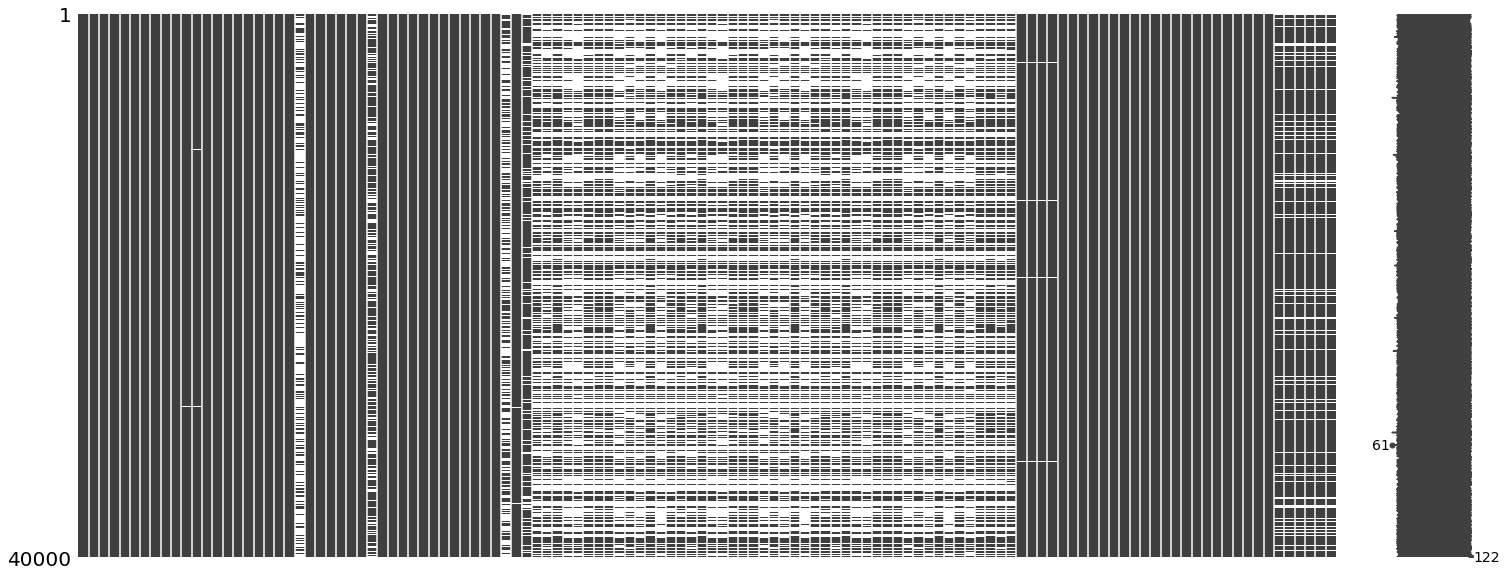

In [6]:
msno.matrix(train)

plt.show()

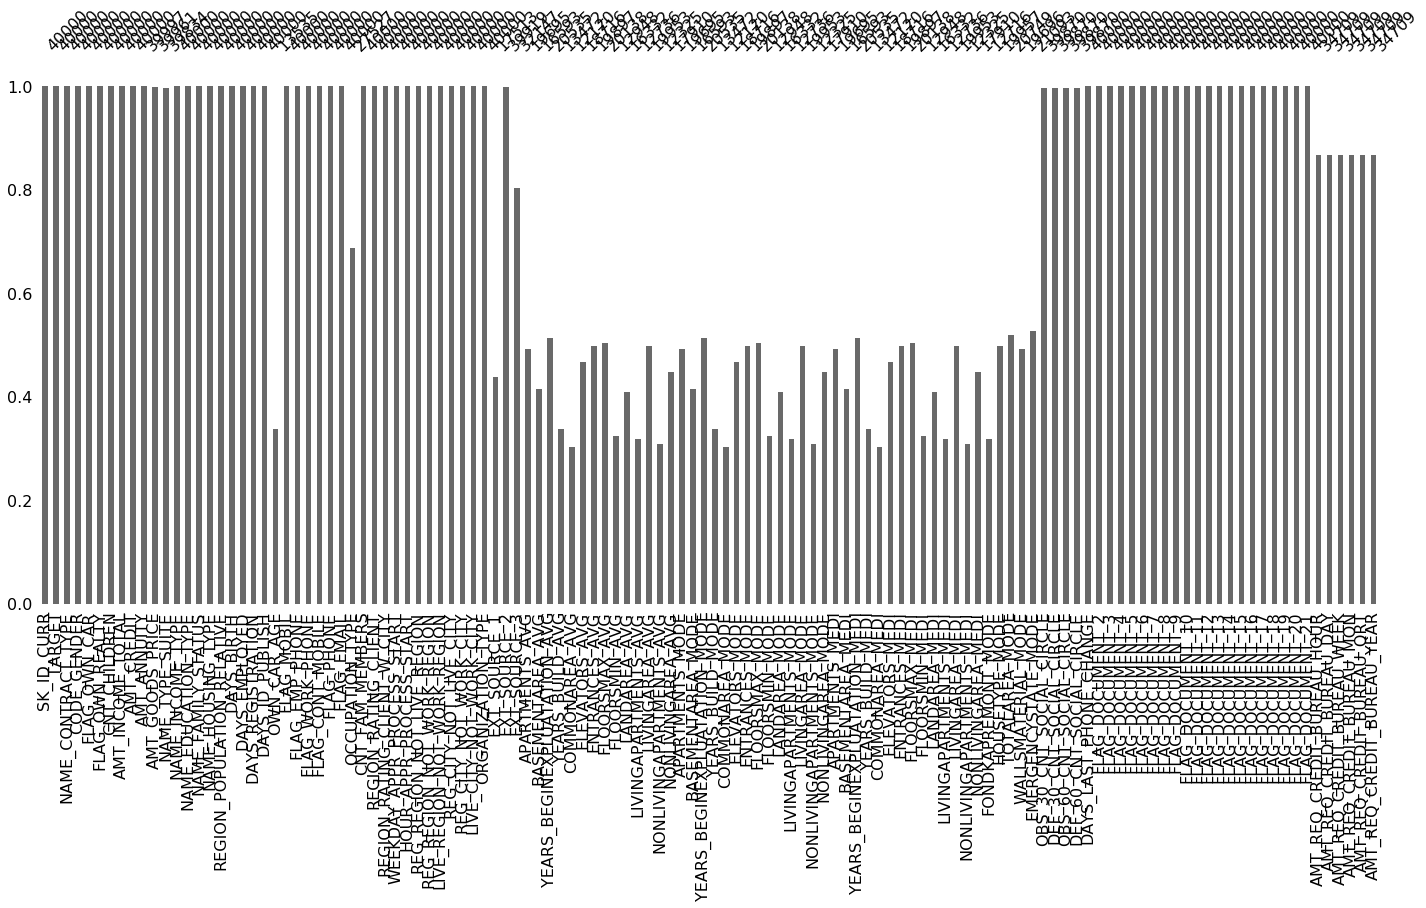

In [7]:
msno.bar(train)

plt.show()

### Test Dataset

In [8]:
# get the test dataset

test = pd.read_csv('application_test.csv')
#test = test.sample(100)
test

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,100042,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
6,100057,Cash loans,M,Y,Y,2,180000.0,499221.0,22117.5,373500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
7,100065,Cash loans,M,N,Y,0,166500.0,180000.0,14220.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
8,100066,Cash loans,F,N,Y,0,315000.0,364896.0,28957.5,315000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
9,100067,Cash loans,F,Y,Y,1,162000.0,45000.0,5337.0,45000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [9]:
# grasp the contents of the test dataset

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [10]:
test.describe()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,48744.000000,48744.000000,4.874400e+04,4.874400e+04,48720.000000,4.874400e+04,48744.000000,48744.000000,48744.000000,48744.000000,...,48744.000000,48744.0,48744.0,48744.0,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000,42695.000000
mean,277796.676350,0.397054,1.784318e+05,5.167404e+05,29426.240209,4.626188e+05,0.021226,-16068.084605,67485.366322,-4967.652716,...,0.001559,0.0,0.0,0.0,0.002108,0.001803,0.002787,0.009299,0.546902,1.983769
std,103169.547296,0.709047,1.015226e+05,3.653970e+05,16016.368315,3.367102e+05,0.014428,4325.900393,144348.507136,3552.612035,...,0.039456,0.0,0.0,0.0,0.046373,0.046132,0.054037,0.110924,0.693305,1.838873
min,100001.000000,0.000000,2.694150e+04,4.500000e+04,2295.000000,4.500000e+04,0.000253,-25195.000000,-17463.000000,-23722.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188557.750000,0.000000,1.125000e+05,2.606400e+05,17973.000000,2.250000e+05,0.010006,-19637.000000,-2910.000000,-7459.250000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,277549.000000,0.000000,1.575000e+05,4.500000e+05,26199.000000,3.960000e+05,0.018850,-15785.000000,-1293.000000,-4490.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,367555.500000,1.000000,2.250000e+05,6.750000e+05,37390.500000,6.300000e+05,0.028663,-12496.000000,-296.000000,-1901.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
max,456250.000000,20.000000,4.410000e+06,2.245500e+06,180576.000000,2.245500e+06,0.072508,-7338.000000,365243.000000,0.000000,...,1.000000,0.0,0.0,0.0,2.000000,2.000000,2.000000,6.000000,7.000000,17.000000


In [11]:
# check whether each feature value has missing values of the test dataset

test_n_missing_values = test.isnull().sum().drop("SK_ID_CURR")

test_n_missing_values_table = pd.DataFrame({
    'missing_values': test_n_missing_values
})

test_n_missing_values_table

,missing_values
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
AMT_CREDIT,0
AMT_ANNUITY,24
AMT_GOODS_PRICE,0
NAME_TYPE_SUITE,911


### Concatenated Dataset

In [12]:
# concatenate the train dataset with the test dataset

train_test = train.append(test)

train_test

C:\Users\umini\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,TARGET,TOTALAREA_MODE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
38675,34911.0,1078200.0,900000.0,121500.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0.0,NaN,NaN,TUESDAY,NaN,NaN,NaN,NaN,NaN,NaN
164523,21888.0,450000.0,450000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0264,"Stone, brick",TUESDAY,0.9851,0.9851,0.9851,0.7960,0.7987,0.8040
142106,16011.0,284400.0,225000.0,76500.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,FRIDAY,NaN,NaN,NaN,NaN,NaN,NaN
226079,39474.0,1350000.0,1350000.0,135000.0,0.0,0.0,0.0,1.0,0.0,3.0,...,0.0,0.1386,"Stone, brick",THURSDAY,0.9955,0.9955,0.9955,0.9388,0.9396,0.9412
248864,32602.5,675000.0,675000.0,112500.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,NaN,NaN,MONDAY,NaN,NaN,NaN,NaN,NaN,NaN
111004,57712.5,2013840.0,1800000.0,405000.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0833,"Stone, brick",MONDAY,0.9732,0.9732,0.9732,NaN,NaN,NaN
288626,43033.5,1012653.0,931500.0,90000.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,NaN,NaN,SATURDAY,NaN,NaN,NaN,NaN,NaN,NaN
85898,36328.5,755190.0,675000.0,202500.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0610,Panel,MONDAY,0.9861,0.9861,0.9861,0.8096,0.8121,0.8171
186150,30280.5,760225.5,679500.0,171000.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,NaN,NaN,SUNDAY,NaN,NaN,NaN,NaN,NaN,NaN
235786,26073.0,328365.0,297000.0,157500.0,0.0,0.0,0.0,2.0,0.0,3.0,...,0.0,NaN,NaN,MONDAY,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# grasp the contents of the concatenated dataset

train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88744 entries, 38675 to 48743
Columns: 122 entries, AMT_ANNUITY to YEARS_BUILD_MODE
dtypes: float64(66), int64(40), object(16)
memory usage: 83.3+ MB


In [14]:
train_test.describe()

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET,TOTALAREA_MODE,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
count,88717.000000,8.874400e+04,8.870500e+04,8.874400e+04,77404.000000,77404.000000,77404.000000,77404.000000,77404.000000,77404.000000,...,88744.000000,88744.000000,40000.000000,46869.000000,46423.000000,46423.000000,46423.000000,30398.000000,30398.000000,30398.000000
mean,28402.491039,5.532951e+05,4.964722e+05,1.741046e+05,0.003798,0.004393,0.123727,0.426399,0.016795,1.957896,...,0.052578,278162.516767,0.076475,0.105218,0.978352,0.978341,0.977742,0.752056,0.755305,0.759232
std,15401.427408,3.843679e+05,3.535357e+05,1.018050e+05,0.082348,0.068435,0.619754,1.154654,0.137160,1.862098,...,0.223191,103024.685872,0.265760,0.110129,0.053948,0.054567,0.058960,0.113043,0.111823,0.109938
min,1980.000000,4.500000e+04,4.050000e+04,2.565000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,100001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17361.000000,2.695500e+05,2.250000e+05,1.125000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,188925.500000,0.000000,0.042500,0.976700,0.976700,0.976200,0.687200,0.691400,0.692900
50%,25578.000000,4.545000e+05,4.500000e+05,1.575000e+05,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,278352.500000,0.000000,0.069800,0.981600,0.981600,0.981600,0.755200,0.758500,0.758300
75%,35955.000000,7.355790e+05,6.750000e+05,2.070000e+05,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,...,0.000000,367545.250000,0.000000,0.131900,0.986600,0.986600,0.986600,0.823200,0.825600,0.823600
max,258025.500000,4.050000e+06,4.050000e+06,4.500000e+06,9.000000,3.000000,27.000000,261.000000,7.000000,17.000000,...,1.000000,456250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# check whether each feature value has missing values of the concatenated dataset

train_test_n_missing_values = train_test.isnull().sum().drop("SK_ID_CURR")

train_test_n_missing_values_table = pd.DataFrame({
    'missing_values': train_test_n_missing_values
})

train_test_n_missing_values_table

,missing_values
AMT_ANNUITY,27
AMT_CREDIT,0
AMT_GOODS_PRICE,39
AMT_INCOME_TOTAL,0
AMT_REQ_CREDIT_BUREAU_DAY,11340
AMT_REQ_CREDIT_BUREAU_HOUR,11340
AMT_REQ_CREDIT_BUREAU_MON,11340
AMT_REQ_CREDIT_BUREAU_QRT,11340
AMT_REQ_CREDIT_BUREAU_WEEK,11340
AMT_REQ_CREDIT_BUREAU_YEAR,11340


In [16]:
# create dummies on all columns containing object elements

new_train_test = pd.get_dummies(train_test)

new_train_test

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
38675,34911.0,1078200.0,900000.0,121500.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0,0,0,0,0,0,0,0,1,0
164523,21888.0,450000.0,450000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
142106,16011.0,284400.0,225000.0,76500.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
226079,39474.0,1350000.0,1350000.0,135000.0,0.0,0.0,0.0,1.0,0.0,3.0,...,0,1,0,0,0,0,0,1,0,0
248864,32602.5,675000.0,675000.0,112500.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0,0,0,0,1,0,0,0,0,0
111004,57712.5,2013840.0,1800000.0,405000.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,0
288626,43033.5,1012653.0,931500.0,90000.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0,0,0,0,0,1,0,0,0,0
85898,36328.5,755190.0,675000.0,202500.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,1,0,0,0,0,0
186150,30280.5,760225.5,679500.0,171000.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
235786,26073.0,328365.0,297000.0,157500.0,0.0,0.0,0.0,2.0,0.0,3.0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
# check the "dummies"

new_train_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88744 entries, 38675 to 48743
Columns: 243 entries, AMT_ANNUITY to WEEKDAY_APPR_PROCESS_START_WEDNESDAY
dtypes: float64(66), int64(40), uint8(137)
memory usage: 84.0 MB


In [18]:
#  compute all correlation coefficients of the new dataset containing dummies

corr_mat = new_train_test.corr()

corr_mat

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
AMT_ANNUITY,1.000000,0.754311,0.761463,0.455376,-0.001019,0.004845,0.008228,0.016015,0.003379,-0.028342,...,0.049482,0.003376,-0.007365,-0.009136,0.004146,-0.011699,-0.006315,0.001009,0.005988,0.010315
AMT_CREDIT,0.754311,1.000000,0.987740,0.372401,0.004629,0.004291,0.057045,-0.006573,0.010515,-0.040575,...,0.041279,0.007425,-0.007741,-0.004405,-0.000758,-0.005524,0.006266,-0.002001,-0.001920,0.009971
AMT_GOODS_PRICE,0.761463,0.987740,1.000000,0.378784,0.005387,0.004627,0.058108,-0.006120,0.010609,-0.043202,...,0.042654,0.010451,-0.009529,-0.004840,-0.002277,-0.005230,0.009558,-0.001234,-0.002290,0.009483
AMT_INCOME_TOTAL,0.455376,0.372401,0.378784,1.000000,0.000232,0.004656,0.031791,0.016639,-0.002659,0.021392,...,0.073828,0.026310,-0.006501,-0.006621,0.002777,-0.004841,0.001217,0.001469,0.000809,0.004540
AMT_REQ_CREDIT_BUREAU_DAY,-0.001019,0.004629,0.005387,0.000232,1.000000,0.262970,0.000917,-0.006435,0.092722,-0.005445,...,0.000129,0.000540,-0.002152,0.002118,-0.003789,-0.004158,0.000789,0.000909,0.004813,-0.001266
AMT_REQ_CREDIT_BUREAU_HOUR,0.004845,0.004291,0.004627,0.004656,0.262970,1.000000,0.008813,-0.007517,0.010033,-0.000779,...,0.002216,-0.000244,-0.005201,0.005035,-0.002871,0.006407,0.020230,-0.000816,-0.008055,-0.008992
AMT_REQ_CREDIT_BUREAU_MON,0.008228,0.057045,0.058108,0.031791,0.000917,0.008813,1.000000,-0.023481,0.015070,-0.005203,...,0.018705,0.014218,-0.007943,0.004791,-0.007731,0.009014,0.005441,-0.004615,-0.010886,0.008632
AMT_REQ_CREDIT_BUREAU_QRT,0.016015,-0.006573,-0.006120,0.016639,-0.006435,-0.007517,-0.023481,1.000000,-0.019115,0.020109,...,-0.002803,0.002421,0.002719,0.007898,-0.006304,-0.010039,-0.003364,0.017640,-0.009411,0.000689
AMT_REQ_CREDIT_BUREAU_WEEK,0.003379,0.010515,0.010609,-0.002659,0.092722,0.010033,0.015070,-0.019115,1.000000,0.007119,...,0.006133,0.000424,0.003076,0.010671,0.002610,-0.001171,-0.000614,-0.001837,-0.006603,-0.002924
AMT_REQ_CREDIT_BUREAU_YEAR,-0.028342,-0.040575,-0.043202,0.021392,-0.005445,-0.000779,-0.005203,0.020109,0.007119,1.000000,...,-0.001510,-0.001924,-0.002186,0.017936,0.009163,-0.003532,-0.001360,0.026414,-0.034275,-0.013536


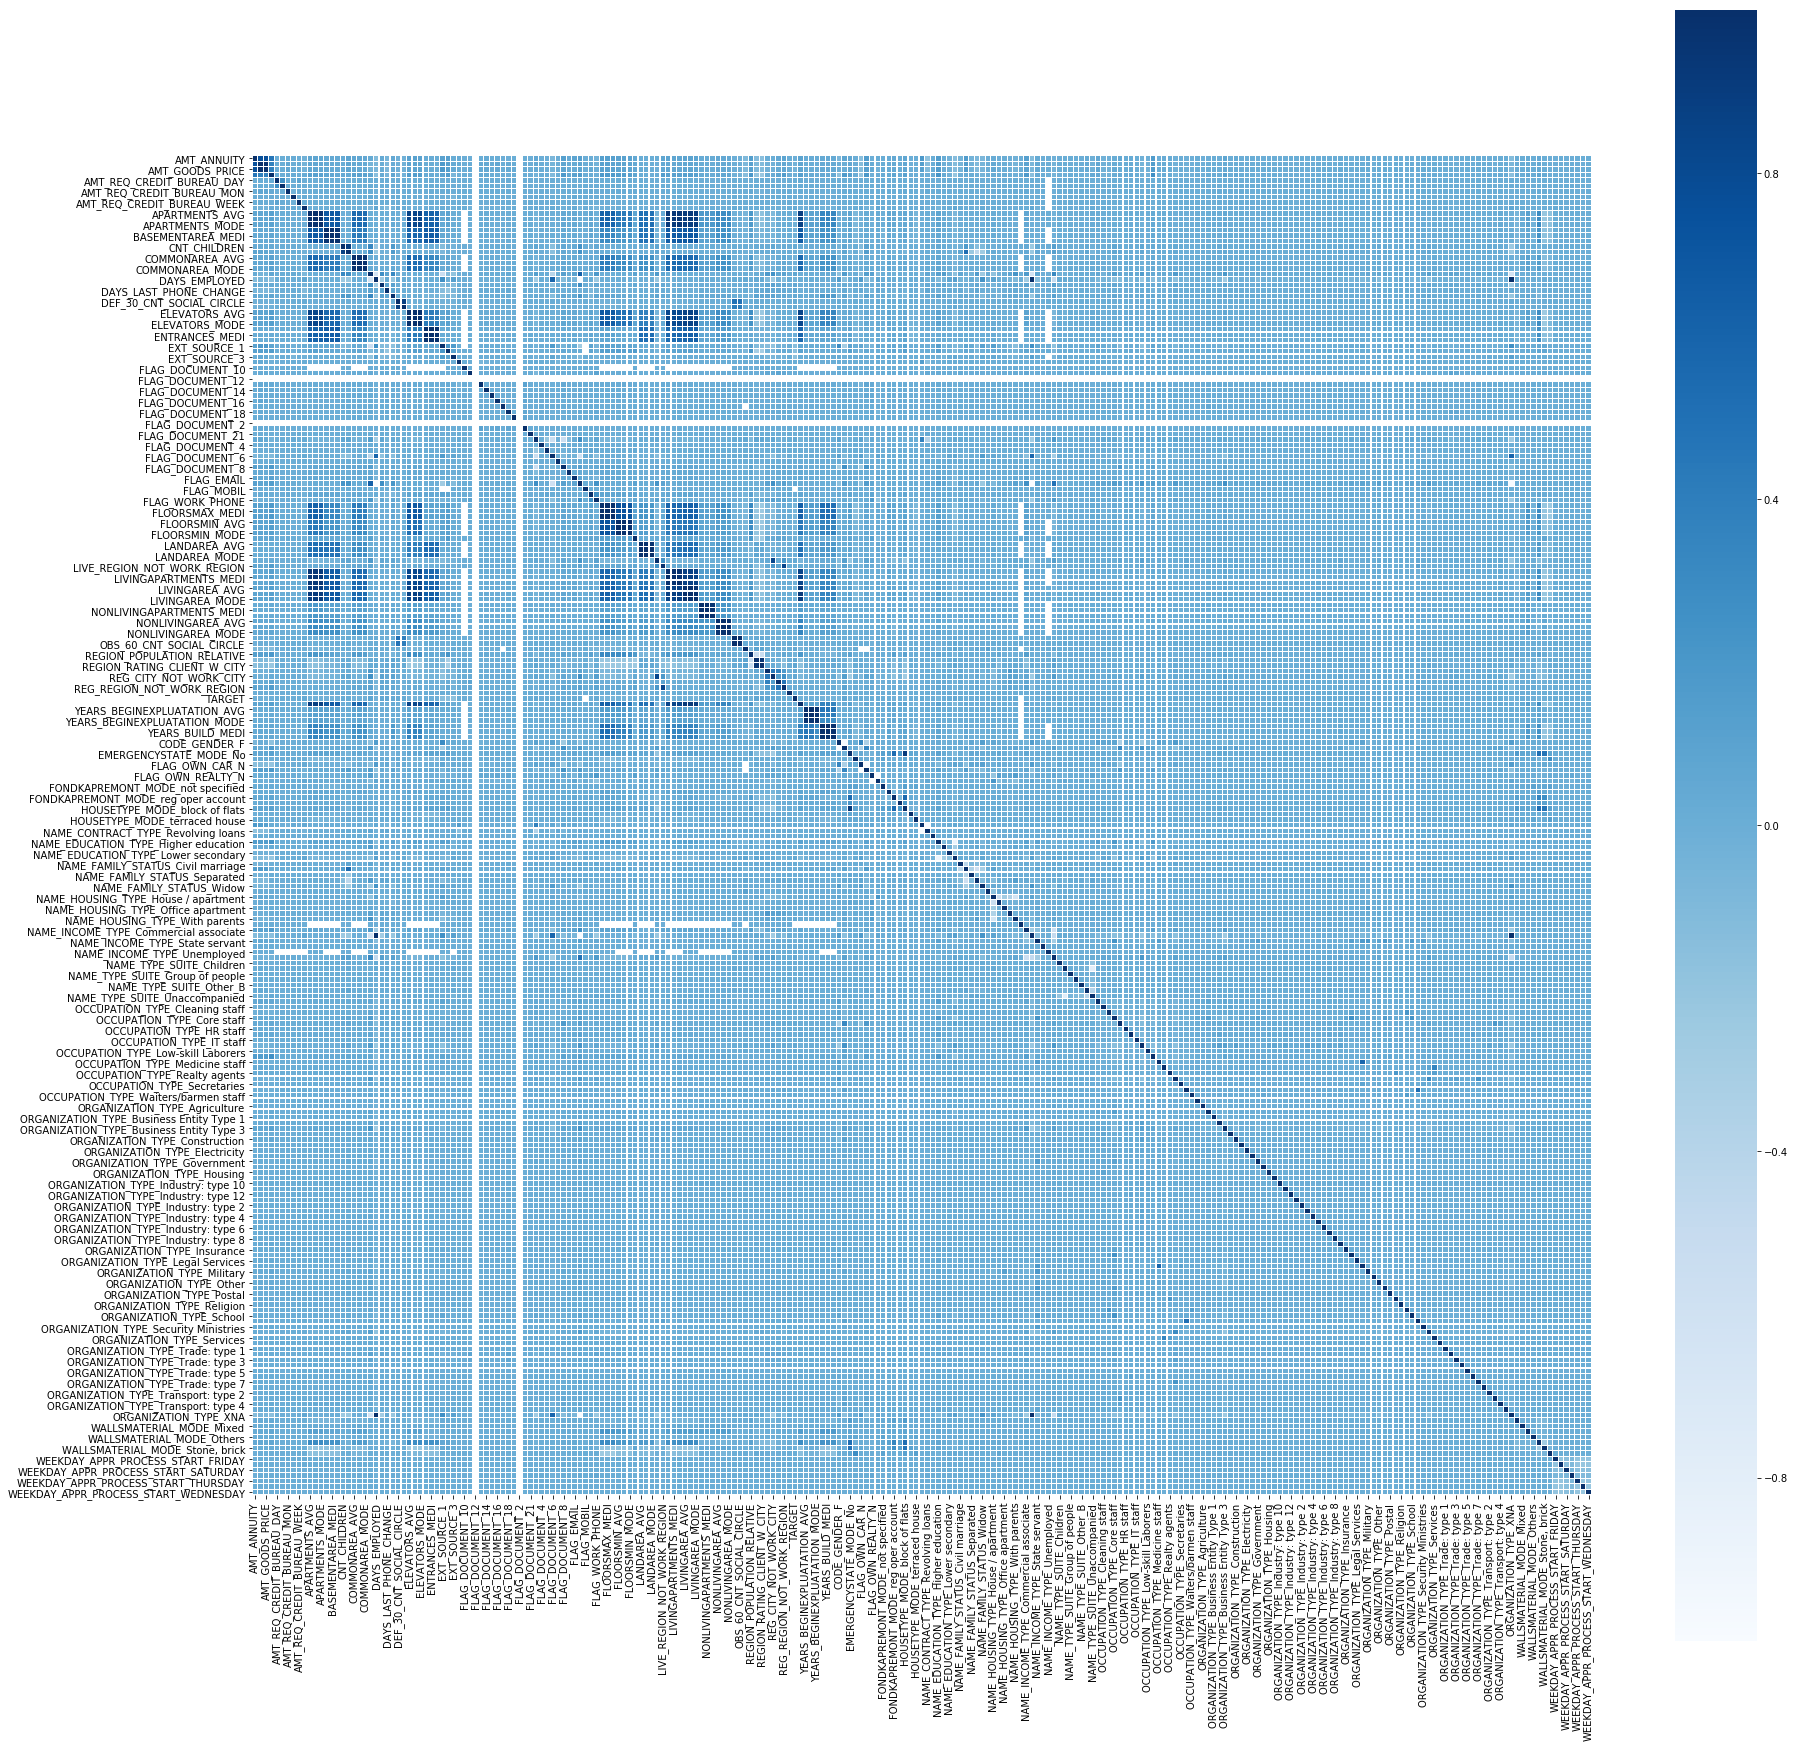

In [19]:
# create the heatmap

plt.figure(figsize=(30,30))
sns.heatmap(corr_mat, linewidth=0.1, square=True, cmap="Blues")

plt.show()

In [20]:
# split the concatenated dataset into the train dataset and the test dataset

train_input = new_train_test[0: train.shape[0]].copy()
print("train_inout shape is", train_input.shape)

test_input = new_train_test[train.shape[0]:].copy()
print("test_inout shape is", test_input.shape)

train_inout shape is (40000, 243)
test_inout shape is (48744, 243)


## [Task 1] Create a Pipeline

In [21]:
X = train_input.drop("TARGET",axis=1).values
y = train_input.loc[:,'TARGET'].values

In [22]:
X

array([[3.49110e+04, 1.07820e+06, 9.00000e+05, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [2.18880e+04, 4.50000e+05, 4.50000e+05, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [1.60110e+04, 2.84400e+05, 2.25000e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.01250e+04, 2.02500e+05, 2.02500e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.36250e+04, 2.25000e+05, 2.25000e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.50155e+04, 3.15000e+05, 3.15000e+05, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [23]:
y

array([0., 0., 0., ..., 0., 0., 0.])

In [24]:
# trainとtestに分ける
#X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.3)
#print(len(X_train)/len(X))

In [25]:
# まずLithgbmのパイプラインを作る

lgb_train = lgb.Dataset(X,y)

In [26]:
lgb_eval = lgb.Dataset(X, y, reference=lgb_train)

In [27]:
lgb_params = {'objective':'binary',
               'boosting_type': 'rf',
               'subsample': 0.623,
               'colsample_bytree': 0.7,
               'num_leaves': 127,
               'max_depth': 8,
               'seed': 99,
               'bagging_freq': 1,
               'n_jobs': 4}

In [28]:
model = lgb.train(lgb_params, lgb_train, valid_sets=lgb_eval)

[1]	valid_0's binary_logloss: 0.27515
[2]	valid_0's binary_logloss: 0.242909
[3]	valid_0's binary_logloss: 0.231955
[4]	valid_0's binary_logloss: 0.232099
[5]	valid_0's binary_logloss: 0.229809
[6]	valid_0's binary_logloss: 0.22906
[7]	valid_0's binary_logloss: 0.227501
[8]	valid_0's binary_logloss: 0.226061
[9]	valid_0's binary_logloss: 0.22611
[10]	valid_0's binary_logloss: 0.226262
[11]	valid_0's binary_logloss: 0.225645
[12]	valid_0's binary_logloss: 0.225488
[13]	valid_0's binary_logloss: 0.225255
[14]	valid_0's binary_logloss: 0.225506
[15]	valid_0's binary_logloss: 0.225074
[16]	valid_0's binary_logloss: 0.2251
[17]	valid_0's binary_logloss: 0.224722
[18]	valid_0's binary_logloss: 0.224455
[19]	valid_0's binary_logloss: 0.224253
[20]	valid_0's binary_logloss: 0.223964
[21]	valid_0's binary_logloss: 0.223969
[22]	valid_0's binary_logloss: 0.223813
[23]	valid_0's binary_logloss: 0.223723
[24]	valid_0's binary_logloss: 0.223953
[25]	valid_0's binary_logloss: 0.224057
[26]	valid_0's

In [29]:
y_pred = model.predict(X)

In [30]:
# predict train_data

y_pred

array([0.03935769, 0.1915281 , 0.05310658, ..., 0.08182333, 0.07296021,
       0.08291199])

In [31]:
# predict  test_data
y_test_pred = model.predict(test_input.values)

In [32]:
y_test_pred

array([0.0657095 , 0.1195268 , 0.04522245, ..., 0.04386381, 0.07048532,
       0.13998288])

In [33]:
#sub = pd.read_csv('sample_submission.csv')

In [34]:
#sub['TARGET'] = y_test_pred

In [35]:
#sub.to_csv('pipeline4.csv', index=False)

In [36]:
#sub.head()

## Task2 make_auc_function

In [37]:
# def auc
def make_roc_curve (y_true, y_pred):
    from sklearn.metrics import roc_curve
    from sklearn import metrics

    fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=1)
    auc = metrics.auc(fpr, tpr)
    print('auc{}'.format(auc))

    # ROC
    # ROC曲線をプロット
    plt.plot(fpr, tpr, label='ROC curve (area = %.2f)'%auc)
    plt.legend()
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    

auc0.8395461520640969


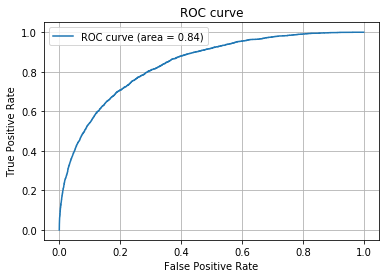

In [38]:
make_roc_curve(y, y_pred)

### Task3

In [39]:
new_train_test

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
38675,34911.0,1078200.0,900000.0,121500.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0,0,0,0,0,0,0,0,1,0
164523,21888.0,450000.0,450000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
142106,16011.0,284400.0,225000.0,76500.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
226079,39474.0,1350000.0,1350000.0,135000.0,0.0,0.0,0.0,1.0,0.0,3.0,...,0,1,0,0,0,0,0,1,0,0
248864,32602.5,675000.0,675000.0,112500.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0,0,0,0,1,0,0,0,0,0
111004,57712.5,2013840.0,1800000.0,405000.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,0
288626,43033.5,1012653.0,931500.0,90000.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0,0,0,0,0,1,0,0,0,0
85898,36328.5,755190.0,675000.0,202500.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,1,0,0,0,0,0
186150,30280.5,760225.5,679500.0,171000.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
235786,26073.0,328365.0,297000.0,157500.0,0.0,0.0,0.0,2.0,0.0,3.0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
new_train_test['OWN_CAR_AGE']

38675      NaN
164523    15.0
142106     NaN
226079     NaN
248864     NaN
111004    10.0
288626     NaN
85898      NaN
186150    13.0
235786     NaN
234548     7.0
262725    13.0
140185     NaN
147641    17.0
172702     NaN
110292     NaN
155153     NaN
100511     6.0
112628     NaN
224959     3.0
209220    10.0
184826    16.0
116285     NaN
289283     NaN
182385     NaN
298347    64.0
26009      NaN
126026    13.0
22464      NaN
63919      NaN
          ... 
48714      NaN
48715      6.0
48716      NaN
48717      NaN
48718      NaN
48719      NaN
48720     12.0
48721      NaN
48722      NaN
48723      NaN
48724      NaN
48725      NaN
48726      NaN
48727      NaN
48728      NaN
48729      NaN
48730     11.0
48731     14.0
48732      NaN
48733      NaN
48734      NaN
48735      NaN
48736     12.0
48737      NaN
48738     65.0
48739      NaN
48740      NaN
48741      4.0
48742      NaN
48743     22.0
Name: OWN_CAR_AGE, Length: 88744, dtype: float64

In [41]:
# own car ageは車を持ってなくて答えたくないと想定
own_car_age = {'OWN_CAR_AGE':0}
edit_train_test = new_train_test.fillna(value=own_car_age)

In [42]:
edit_train_test

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
38675,34911.0,1078200.0,900000.0,121500.0,0.0,0.0,0.0,0.0,1.0,2.0,...,0,0,0,0,0,0,0,0,1,0
164523,21888.0,450000.0,450000.0,135000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,1,0
142106,16011.0,284400.0,225000.0,76500.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0
226079,39474.0,1350000.0,1350000.0,135000.0,0.0,0.0,0.0,1.0,0.0,3.0,...,0,1,0,0,0,0,0,1,0,0
248864,32602.5,675000.0,675000.0,112500.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0,0,0,0,1,0,0,0,0,0
111004,57712.5,2013840.0,1800000.0,405000.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,1,0,0,0,0,0
288626,43033.5,1012653.0,931500.0,90000.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0,0,0,0,0,1,0,0,0,0
85898,36328.5,755190.0,675000.0,202500.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,1,0,0,0,0,0
186150,30280.5,760225.5,679500.0,171000.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1,0,0,0
235786,26073.0,328365.0,297000.0,157500.0,0.0,0.0,0.0,2.0,0.0,3.0,...,0,0,0,0,1,0,0,0,0,0


In [43]:
edit_train_test['OWN_CAR_AGE']

38675      0.0
164523    15.0
142106     0.0
226079     0.0
248864     0.0
111004    10.0
288626     0.0
85898      0.0
186150    13.0
235786     0.0
234548     7.0
262725    13.0
140185     0.0
147641    17.0
172702     0.0
110292     0.0
155153     0.0
100511     6.0
112628     0.0
224959     3.0
209220    10.0
184826    16.0
116285     0.0
289283     0.0
182385     0.0
298347    64.0
26009      0.0
126026    13.0
22464      0.0
63919      0.0
          ... 
48714      0.0
48715      6.0
48716      0.0
48717      0.0
48718      0.0
48719      0.0
48720     12.0
48721      0.0
48722      0.0
48723      0.0
48724      0.0
48725      0.0
48726      0.0
48727      0.0
48728      0.0
48729      0.0
48730     11.0
48731     14.0
48732      0.0
48733      0.0
48734      0.0
48735      0.0
48736     12.0
48737      0.0
48738     65.0
48739      0.0
48740      0.0
48741      4.0
48742      0.0
48743     22.0
Name: OWN_CAR_AGE, Length: 88744, dtype: float64

In [44]:
# split the concatenated dataset into the train dataset and the test dataset

train2_input = edit_train_test[0: train.shape[0]].copy()
print("train_inout shape is", train_input.shape)

test2_input = edit_train_test[train.shape[0]:].copy()
print("test_inout shape is", test_input.shape)

train_inout shape is (40000, 243)
test_inout shape is (48744, 243)


In [45]:
X2 = train2_input.drop("TARGET",axis=1).values
y2 = train2_input.loc[:,'TARGET'].values

In [46]:
lgb_train2 = lgb.Dataset(X2,y2)

In [47]:
lgb_eval2 = lgb.Dataset(X2, y2, reference=lgb_train)

In [48]:
model = lgb.train(lgb_params, lgb_train2, valid_sets=lgb_eval2)

[1]	valid_0's binary_logloss: 0.275205
[2]	valid_0's binary_logloss: 0.242923
[3]	valid_0's binary_logloss: 0.231964
[4]	valid_0's binary_logloss: 0.232127
[5]	valid_0's binary_logloss: 0.230003
[6]	valid_0's binary_logloss: 0.229272
[7]	valid_0's binary_logloss: 0.227687
[8]	valid_0's binary_logloss: 0.226247
[9]	valid_0's binary_logloss: 0.226281
[10]	valid_0's binary_logloss: 0.2264
[11]	valid_0's binary_logloss: 0.225775
[12]	valid_0's binary_logloss: 0.225604
[13]	valid_0's binary_logloss: 0.225361
[14]	valid_0's binary_logloss: 0.225603
[15]	valid_0's binary_logloss: 0.225169
[16]	valid_0's binary_logloss: 0.225253
[17]	valid_0's binary_logloss: 0.224871
[18]	valid_0's binary_logloss: 0.224595
[19]	valid_0's binary_logloss: 0.224389
[20]	valid_0's binary_logloss: 0.224087
[21]	valid_0's binary_logloss: 0.224079
[22]	valid_0's binary_logloss: 0.223921
[23]	valid_0's binary_logloss: 0.223831
[24]	valid_0's binary_logloss: 0.224053
[25]	valid_0's binary_logloss: 0.224153
[26]	valid_

In [49]:
y_pred2 = model.predict(X2)

auc0.8393128298316961


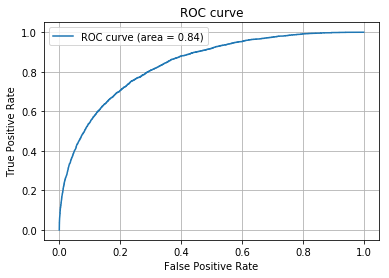

In [50]:
make_roc_curve(y2, y_pred2)

In [51]:
y_test_pred2 = model.predict(test_input.values)

In [52]:
#sub2 = pd.read_csv('sample_submission.csv')

In [53]:
#sub2['TARGET'] = y_test_pred2

In [54]:
#sub2.to_csv('own_car_age_pipeline.csv', index=False)

In [55]:
#sub2.head()

In [56]:
# 特徴量の重要度をプロット
#lgb.plot_importance(model, figsize=(12,40))

### 上位3つの重要度が高い

In [57]:
fti = model.feature_importance()

In [58]:
columns = train_input.drop("TARGET",axis=1).columns

In [59]:
ftidf = pd.DataFrame({"FTI":fti,"columns":columns}).sort_values('FTI', ascending=False)

In [60]:
ftidf

,FTI,columns
35,747,EXT_SOURCE_2
36,737,EXT_SOURCE_3
34,698,EXT_SOURCE_1
21,598,DAYS_BIRTH
22,468,DAYS_EMPLOYED
24,459,DAYS_LAST_PHONE_CHANGE
0,455,AMT_ANNUITY
25,435,DAYS_REGISTRATION
23,419,DAYS_ID_PUBLISH
2,384,AMT_GOODS_PRICE


In [61]:
# nanのないEXT_SOURCE_2からEXT_SOURCE_1,EXT_SOURCE_3の欠損を補えないか
EXT_SOURCE_1_2_3 = edit_train_test[['EXT_SOURCE_2','EXT_SOURCE_1','EXT_SOURCE_3']]
EXT_SOURCE_1_2_3

,EXT_SOURCE_2,EXT_SOURCE_1,EXT_SOURCE_3
38675,0.747441,NaN,0.782608
164523,0.366107,0.433732,0.119119
142106,0.479158,NaN,NaN
226079,0.688942,NaN,0.470456
248864,0.466262,NaN,0.513694
111004,0.742614,0.318922,0.174564
288626,0.491474,NaN,0.771362
85898,0.682206,NaN,NaN
186150,0.684775,NaN,0.345785
235786,0.588906,0.364960,0.235311


In [62]:
# df_corr = df.corr()
EXT_SOURCE_1_2_3.corr()

,EXT_SOURCE_2,EXT_SOURCE_1,EXT_SOURCE_3
EXT_SOURCE_2,1.000000,0.208879,0.104158
EXT_SOURCE_1,0.208879,1.000000,0.168050
EXT_SOURCE_3,0.104158,0.168050,1.000000


### 1と2に弱い相関 , 1と3に弱い相関

In [63]:
EXT_SOURCE_1_2_3.shape[0]

88744

In [64]:
np.isnan(EXT_SOURCE_1_2_3.iloc[2,0])

False

In [65]:
mean1 = EXT_SOURCE_1_2_3['EXT_SOURCE_1'].mean()

In [66]:
mean2 = EXT_SOURCE_1_2_3['EXT_SOURCE_2'].mean()

In [67]:
mean3 = EXT_SOURCE_1_2_3['EXT_SOURCE_3'].mean()

In [68]:
# nanのEXT_SOURCE_1[i] = EXT_SOURCE_1.mean()/EXT_SOURCE_2.mean() * EXT_SOURCE_2[i]を代入してみる
for i in range(EXT_SOURCE_1_2_3.shape[0]):
    if np.isnan(EXT_SOURCE_1_2_3.iloc[i, 1]):
        EXT_SOURCE_1_2_3.iloc[i,1] = mean1 / mean2 * EXT_SOURCE_1_2_3.iloc[i,0]
    

C:\Users\umini\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\umini\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [69]:
mean1_new = EXT_SOURCE_1_2_3['EXT_SOURCE_1'].mean()

In [70]:
# nanのEXT_SOURCE_3[i] = EXT_SOURCE_3.mean()/EXT_SOURCE_1.mean() * EXT_SOURCE_1[i]を代入してみる
for i in range(EXT_SOURCE_1_2_3.shape[0]):
    if np.isnan(EXT_SOURCE_1_2_3.iloc[i, 2]):
        EXT_SOURCE_1_2_3.iloc[i,2] = mean3 / mean1_new * EXT_SOURCE_1_2_3.iloc[i,1]

C:\Users\umini\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [71]:
EXT_SOURCE_1_2_3

,EXT_SOURCE_2,EXT_SOURCE_1,EXT_SOURCE_3
38675,0.747441,0.726073,0.782608
164523,0.366107,0.433732,0.119119
142106,0.479158,0.465459,0.472828
226079,0.688942,0.669246,0.470456
248864,0.466262,0.452933,0.513694
111004,0.742614,0.318922,0.174564
288626,0.491474,0.477424,0.771362
85898,0.682206,0.662703,0.673194
186150,0.684775,0.665198,0.345785
235786,0.588906,0.364960,0.235311


In [ ]:
EXT_SOURCE_1_2_3 = edit_train_test[['EXT_SOURCE_2','EXT_SOURCE_1','EXT_SOURCE_3']]

In [83]:
edit_train_test['EXT_SOURCE_1'] =EXT_SOURCE_1_2_3['EXT_SOURCE_1']

In [84]:
edit_train_test['EXT_SOURCE_3'] =EXT_SOURCE_1_2_3['EXT_SOURCE_3']

In [85]:
# split the concatenated dataset into the train dataset and the test dataset

train3_input = edit_train_test[0: train.shape[0]].copy()
print("train_inout shape is", train_input.shape)

test3_input = edit_train_test[train.shape[0]:].copy()
print("test_inout shape is", test_input.shape)

train_inout shape is (40000, 243)
test_inout shape is (48744, 243)


38675     0.726073
164523    0.433732
142106    0.465459
226079    0.669246
248864    0.452933
111004    0.318922
288626    0.477424
85898     0.662703
186150    0.665198
235786    0.364960
234548    0.571479
262725    0.264525
140185    0.750593
147641    0.612114
172702    0.528901
110292    0.237809
155153    0.277725
100511    0.678548
112628    0.527810
224959    0.755652
209220    0.329273
184826    0.262953
116285    0.457407
289283    0.573437
182385    0.303248
298347    0.099768
26009     0.086429
126026    0.724331
22464     0.613766
63919     0.713440
            ...   
178748    0.472880
294272    0.581467
164185    0.727899
164436    0.397982
210031    0.324576
218174    0.691826
245946    0.265390
251676    0.729271
189121    0.332265
241036    0.454977
49848     0.171159
204520    0.256966
264213    0.195503
57839     0.776126
9343      0.544425
265178    0.569857
115020    0.559523
120364    0.439740
77509     0.630164
249732    0.211506
98132     0.668823
132285    0.

In [98]:
X3 = train3_input.drop("TARGET",axis=1).values
y3 = train3_input.loc[:,'TARGET'].values

In [99]:
lgb_train3 = lgb.Dataset(X3,y3)

In [100]:
lgb_eval3 = lgb.Dataset(X3, y3, reference=lgb_train)

In [101]:
model3 = lgb.train(lgb_params, lgb_train2, valid_sets=lgb_eval2)

[1]	valid_0's binary_logloss: 0.275205
[2]	valid_0's binary_logloss: 0.242923
[3]	valid_0's binary_logloss: 0.231964
[4]	valid_0's binary_logloss: 0.232127
[5]	valid_0's binary_logloss: 0.230003
[6]	valid_0's binary_logloss: 0.229272
[7]	valid_0's binary_logloss: 0.227687
[8]	valid_0's binary_logloss: 0.226247
[9]	valid_0's binary_logloss: 0.226281
[10]	valid_0's binary_logloss: 0.2264
[11]	valid_0's binary_logloss: 0.225775
[12]	valid_0's binary_logloss: 0.225604
[13]	valid_0's binary_logloss: 0.225361
[14]	valid_0's binary_logloss: 0.225603
[15]	valid_0's binary_logloss: 0.225169
[16]	valid_0's binary_logloss: 0.225253
[17]	valid_0's binary_logloss: 0.224871
[18]	valid_0's binary_logloss: 0.224595
[19]	valid_0's binary_logloss: 0.224389
[20]	valid_0's binary_logloss: 0.224087
[21]	valid_0's binary_logloss: 0.224079
[22]	valid_0's binary_logloss: 0.223921
[23]	valid_0's binary_logloss: 0.223831
[24]	valid_0's binary_logloss: 0.224053
[25]	valid_0's binary_logloss: 0.224153
[26]	valid_

In [109]:
y_pred3 = model3.predict(X3)

auc0.8022494879074332


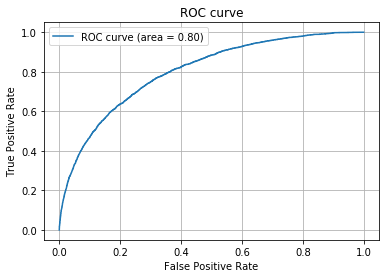

In [110]:
make_roc_curve(y3, y_pred3)

In [111]:
y_test_pred3 = model3.predict(test3_input)

In [112]:
#sub3 = pd.read_csv('sample_submission.csv')

In [113]:
#sub3['TARGET'] = y_test_pred3

In [114]:
#sub3.to_csv('own_car_age_pipeline3.csv', index=False)

In [115]:
#sub3.head()

,SK_ID_CURR,TARGET
0,100001,0.063653
1,100005,0.113125
2,100013,0.039111
3,100028,0.045248
4,100038,0.169004


## 結果的に自動車の欠損値を埋めたのはaucが向上したがEXT_SOUSEを埋めたのはaucが下がった
## EXT_SOUSE同士の相関が低すぎたものと考えられる